# Comparison centralized/decentralized


In [1]:
# imports
from copy import deepcopy
import numpy as np

from sklearn.utils import shuffle

import sys
sys.path.append('../src/')

from evaluation import alpha_variance, loss, mean_accuracy
from network import complete_graph
from optimization import average_FW, centralized_FW
from utils import load_breast_dataset

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
X, Y = load_breast_dataset()
M, D = X.shape
N = 2
NB_ITER = 100

nodes_iid = complete_graph(X, Y, nb_nodes=N, cluster_data=False)
nodes_no_iid = complete_graph(X, Y, nb_nodes=N, cluster_data=True)


# set callbacks for optimization analysis
callbacks = {
    'mean-accuracy': [mean_accuracy, []],
    'loss': [loss, []],
    'alpha-variance': [alpha_variance, []]
}

In [3]:
results = {}

nodes_copy = deepcopy(nodes_iid)
results["centralized-iid"] = centralized_FW(nodes_copy, D, NB_ITER, callbacks=callbacks)

nodes_copy = deepcopy(nodes_iid)
results["average-iid"] = average_FW(nodes_copy, D, NB_ITER, callbacks=callbacks)

nodes_copy = deepcopy(nodes_no_iid)
results["average"] = average_FW(nodes_copy, D, NB_ITER, callbacks=callbacks)

print("done")

done


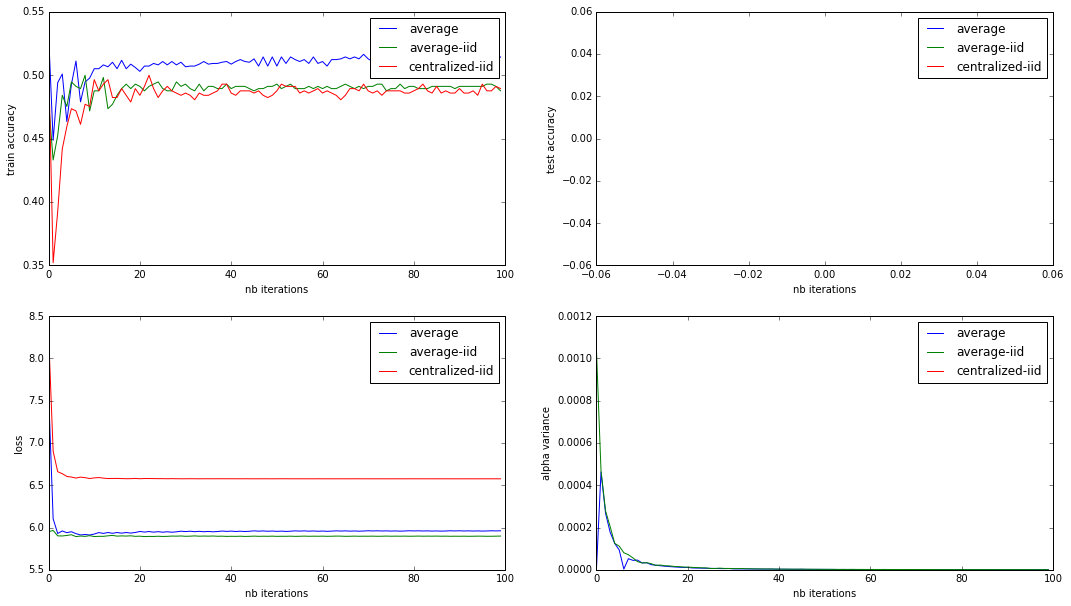

In [4]:
plt.figure(1, figsize=(18, 10))

plt.subplot(221)
plt.xlabel('nb iterations')
plt.ylabel('train accuracy')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['mean-accuracy'][0] for r in r_list], label='{}'.format(k))
plt.legend()

plt.subplot(222)
plt.xlabel('nb iterations')
plt.ylabel('test accuracy')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['mean-accuracy'][1] for r in r_list], label='{}'.format(k))

plt.legend()

plt.subplot(223)
plt.xlabel('nb iterations')
plt.ylabel('loss')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['loss'] for r in r_list], label='{}'.format(k))

plt.legend()

plt.subplot(224)
plt.xlabel('nb iterations')
plt.ylabel('alpha variance')

for k, r_list in results.items():
    plt.plot(range(NB_ITER), [r['alpha-variance'] for r in r_list], label='{}'.format(k))

plt.legend()